# Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Reading the CSV file

In [2]:
data=pd.read_csv("dataset_NN.csv")
data=data.values

In [3]:
np.random.seed(10)
np.random.shuffle(data)

# Splitting the data into training and testing

In [4]:
size = int(0.7 * len(data))
X_train=data[:size,:-1]
Y_train=data[:size,-1]
Y_train=Y_train.astype(int)
X_test=data[size:,:-1]
Y_test=data[size:,-1]
Y_test=Y_test.astype(int)
m=np.mean(X_train,axis=0)
s=np.std(X_train,axis=0)
X_train=(X_train-m)/s
m=np.mean(X_test,axis=0)
s=np.std(X_test,axis=0)
X_test=(X_test-m)/s

# Sigmoid function 

In [5]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

# Softmax FUnction

In [6]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [7]:
class NeuralNetwork:
    def __init__(self,input_size=6,layers=[8,8],output_size=10,activationFun=['tanh','tanh']):
        np.random.seed(0)
        
        model={}
        
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        model['act1']=activationFun[0]
        
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        model['act2']=activationFun[1]
        
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
    
    def forward(self,x):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        act1,act2=self.model['act1'],self.model['act2']
        
        
        z1=np.dot(x,W1)+b1
        if act1=='tanh':
            a1=np.tanh(z1)
        elif act1=='sigmoid':
            a1=sigmoid(z1)
        
        z2=np.dot(a1,W2)+b2
        if act2=='tanh':
            a2=np.tanh(z2)
        elif act2=='sigmoid':
            a2=sigmoid(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        act1,act2=self.model['act1'],self.model['act2']
        
        m=x.shape[0]
        
        a1,a2,y_= self.activation_outputs
        
        delta3=y_- y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        if act2=='tanh':
            delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        elif act2=='sigmoid':
            delta2=(sigmoid(a2)*(1-sigmoid(a2)))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        if act1=='tanh':
            delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        elif act1=='sigmoid':
             delta1=(sigmoid(a1)*(1-sigmoid(a1)))*np.dot(delta2,W2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)+1

In [8]:
class NeuralNetwork2:
    def __init__(self,input_size=6,layers=[8],output_size=10,activationFun=['tanh']):
        np.random.seed(0)
        
        model={}
        
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        model['act1']=activationFun[0]
        
        model['W2']=np.random.randn(layers[0],output_size)
        model['b2']=np.zeros((1,output_size))
        
        self.model=model
    
    def forward(self,x):
        W1,W2=self.model['W1'],self.model['W2']
        b1,b2=self.model['b1'],self.model['b2']
        act1=self.model['act1']
        
        
        z1=np.dot(x,W1)+b1
        if act1=='tanh':
            a1=np.tanh(z1)
        elif act1=='sigmoid':
            a1=sigmoid(z1)
        
        z2=np.dot(a1,W2)+b2
        y_=softmax(z2)
        
        self.activation_outputs=(a1,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2=self.model['W1'],self.model['W2']
        b1,b2=self.model['b1'],self.model['b2']
        act1=self.model['act1']
        
        m=x.shape[0]
        
        a1,y_= self.activation_outputs
        
        delta2=y_- y
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        if act1=='tanh':
            delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        elif act1=='sigmoid':
            delta1=(sigmoid(a1)*(1-sigmoid(a1)))*np.dot(delta2,W2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)+1

# Cross Entropy Loss Function

In [9]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y-1]=1
    return y_oht

# Training the Neural Network

In [10]:
def train(X,Y,model,epochs,batch_size,learning_rate):
    training_loss=[]
    acc = []
    classes=10
    Y_OHT=one_hot(Y,classes)
    
    batch_size=X.shape[0]
    batches=X.shape[0]//batch_size
    
    for ix in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        acc.append(accuracy(X,Y))
        for i in range(batches):
            X=X[i*batch_size:(i+1)*batch_size,:]
            Y_OHT=Y_OHT[i*batch_size:(i+1)*batch_size,:]
            model.backward(X,Y_OHT,learning_rate)     
#         print(f'iteration {ix} loss value {l}')
    return training_loss, acc

# Calculating the accuracy of the model

In [11]:
def accuracy(X,Y):
    Y_pred = model.predict(X)
    count=0
    for i in range(Y_pred.shape[0]):
        if Y_pred[i]==Y[i]:
            count+=1
    return (count/Y_pred.shape[0])*100

# Function to plot the graph

In [12]:
def plot_graph(X):
    fig = plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    plt.plot(X)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Error vs Epoch")
    plt.tight_layout()
    plt.show()

In [13]:
model=NeuralNetwork(input_size=6,layers=[8,6],output_size=10,activationFun=['tanh','tanh'])

# Calculated Accuracy of the model

In [14]:
training_loss, acc = train(X_train,Y_train,model,1000,250,0.001)
# training_loss, acc = train(X_train,Y_train,model,1000,250,5)
# training_loss, acc = train(X_train,Y_train,model,1000,250,0.000001)
print("For 2 Hidden Layers")
print("Training Accuracy: ",accuracy(X_train,Y_train))
print("Testing Accuracy: ",accuracy(X_test,Y_test))

For 2 Hidden Layers
Training Accuracy:  75.42857142857143
Testing Accuracy:  73.16666666666667


# Plotting the graph

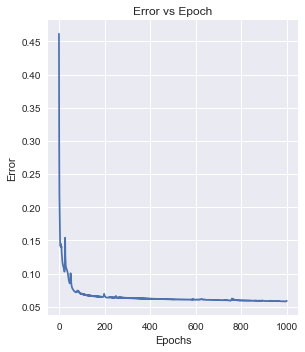

In [15]:
# plot_graph(acc)
plot_graph(training_loss)

In [16]:
model=NeuralNetwork2(input_size=6,layers=[6],output_size=10,activationFun=['tanh'])

In [17]:
training_loss,acc=train(X_train,Y_train,model,1000,200,0.001)
# training_loss,acc=train(X_train,Y_train,model,1000,200,5)
# training_loss,acc=train(X_train,Y_train,model,1000,200,0.000001)
print("For 1 Hidden Layer")
print("Training Accuracy: ",accuracy(X_train,Y_train))
print("Testing Accuracy: ",accuracy(X_test,Y_test))

For 1 Hidden Layer
Training Accuracy:  75.78571428571429
Testing Accuracy:  71.33333333333334


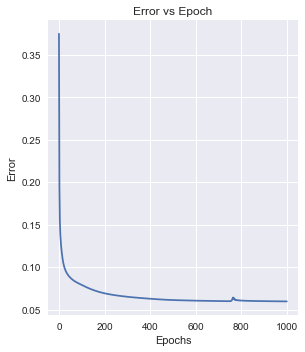

In [18]:
# plot_graph(acc)
plot_graph(training_loss)